## Make sure you install pandas data-reader  and fbprophet

In [297]:
import pandas_datareader.data as reader
import datetime as dt 
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING) 

### Getting Real-Time Crypto Prices from Yahoo! Finance

In [298]:
end = dt.datetime.now()
start = dt.date(end.year - 8, end.month, end.day)

cryptolist = ['AAVE-USD', 'BNB-USD', 'BTC-USD', 'LINK-USD','ADA-USD','ETH-USD', 'SOL-USD', 'USDT-USD', 'UNI1-USD']

In [299]:
#scraping the data from yahoo

df = reader.get_data_yahoo(cryptolist, start, end)['Adj Close']

### Plotting the various prices of each cryptocurrency

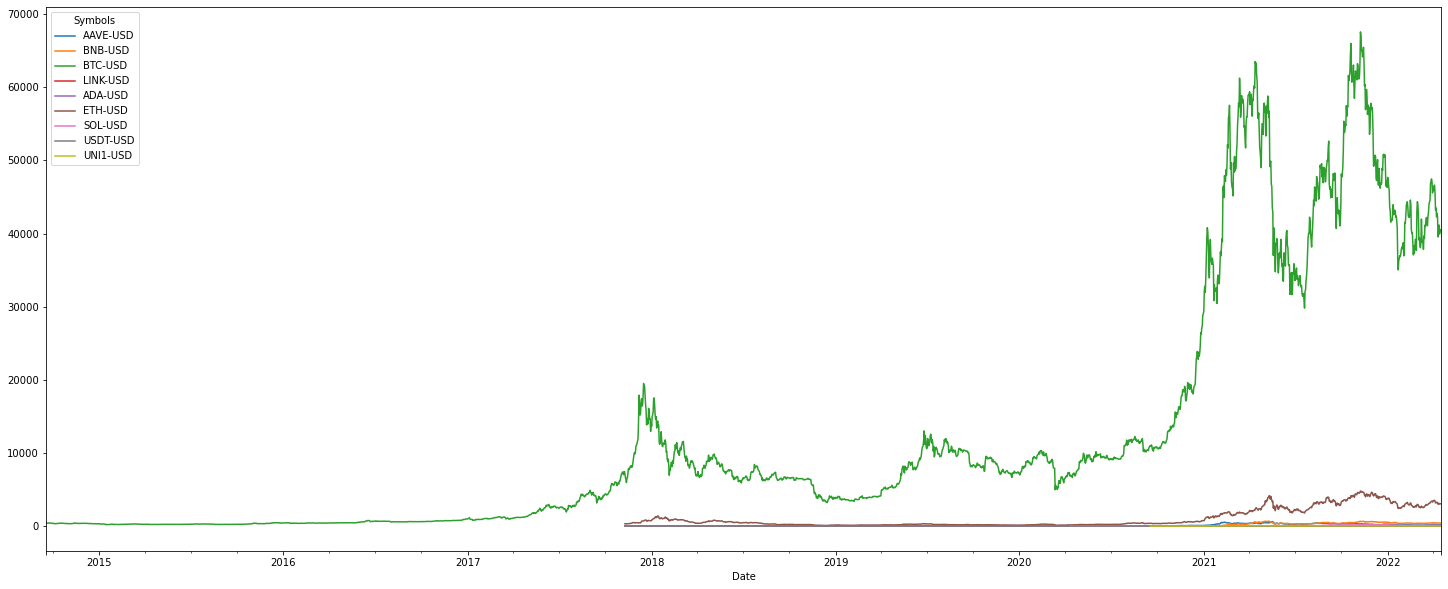

In [300]:
df.plot(figsize = (25,10))
plt.show()

In [301]:
daily_returns = df.pct_change().dropna(axis=0)

In [302]:
daily_returns

Symbols,AAVE-USD,BNB-USD,BTC-USD,LINK-USD,ADA-USD,ETH-USD,SOL-USD,USDT-USD,UNI1-USD
Date,,,,,,,,,
2020-10-03,101.892905,0.033594,-0.002519,0.008649,0.005295,0.000818,-0.029999,0.000059,0.001510
2020-10-04,-0.008964,0.026294,0.011399,0.010792,0.031420,0.017479,-0.012291,0.000251,-0.032358
2020-10-05,0.010331,-0.009838,0.011599,0.023264,0.012413,0.003908,0.056299,-0.000492,-0.068064
2020-10-06,-0.203266,-0.032959,-0.017505,-0.087745,-0.048552,-0.037126,-0.181136,-0.000418,-0.171082
2020-10-07,-0.054659,-0.000350,0.006088,0.020341,0.010689,0.002913,0.053094,0.000259,-0.012059
...,...,...,...,...,...,...,...,...,...
2022-04-13,0.084274,0.022365,0.025906,0.015050,0.020469,0.029029,0.016413,-0.000160,0.036002
2022-04-14,-0.035532,-0.020009,-0.029908,-0.037922,-0.043382,-0.031566,-0.040896,-0.000148,-0.019091
2022-04-15,0.022661,0.006343,0.015474,0.034773,0.023922,0.006956,0.005977,0.000112,0.030181


### To compare cryptos we have to work with returns and not absolute prices Hence, we need to cumulate these returns to compare cryptos

In [303]:
daily_cum_returns = (daily_returns + 1).cumprod() - 1

In [304]:
daily_cum_returns

Symbols,AAVE-USD,BNB-USD,BTC-USD,LINK-USD,ADA-USD,ETH-USD,SOL-USD,USDT-USD,UNI1-USD
Date,,,,,,,,,
2020-10-03,101.892905,0.033594,-0.002519,0.008649,0.005295,0.000818,-0.029999,0.000059,0.001510
2020-10-04,100.970562,0.060771,0.008851,0.019535,0.036881,0.018311,-0.041921,0.000310,-0.030897
2020-10-05,102.024064,0.050335,0.020553,0.043253,0.049752,0.022291,0.012018,-0.000183,-0.096858
2020-10-06,81.082814,0.015717,0.002688,-0.048287,-0.001216,-0.015663,-0.171294,-0.000600,-0.251369
2020-10-07,76.596261,0.015362,0.008793,-0.028928,0.009460,-0.012795,-0.127295,-0.000342,-0.260396
...,...,...,...,...,...,...,...,...,...
2022-04-13,344.311288,14.507407,2.892476,0.537599,9.489512,8.006336,38.984246,-0.000773,1.551565
2022-04-14,332.041540,14.197119,2.776060,0.479291,9.034459,7.722039,37.349057,-0.000921,1.502852
2022-04-15,339.588448,14.293506,2.834490,0.530730,9.274501,7.782711,37.578286,-0.000809,1.578391


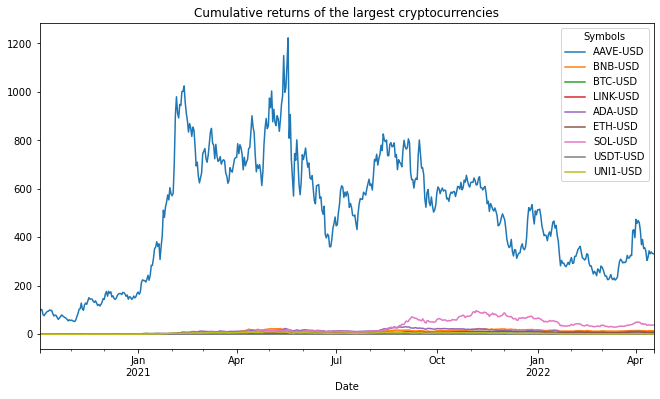

In [305]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
daily_cum_returns.plot(color=colors, figsize=(11, 6))
plt.title('Cumulative returns of the largest cryptocurrencies')
plt.show()

## Crypto price charts over the last 4 years

Text(0.5, 1.0, 'UNI1')

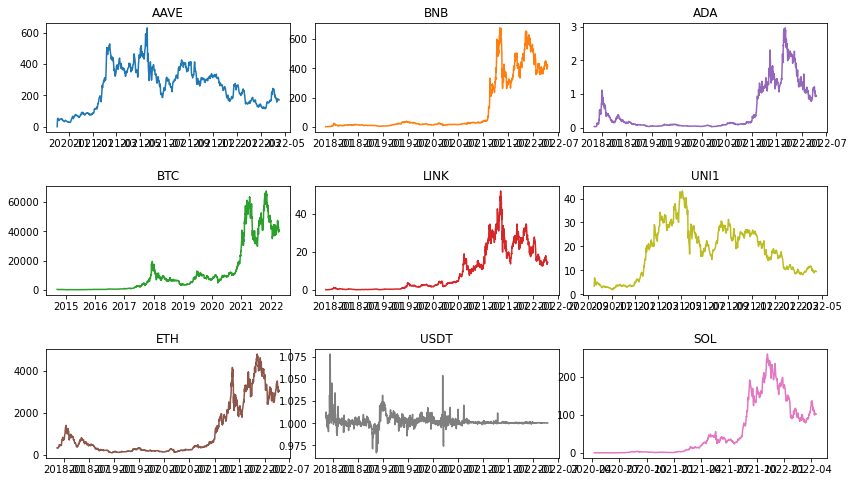

In [306]:
fig, axs = plt.subplots(3, 3, figsize=(14,8), gridspec_kw={'hspace': 0.5, 'wspace': 0.1})

axs[0,0].plot(df['AAVE-USD'], c='#1f77b4')
axs[0,0].set_title('AAVE')

axs[0,1].plot(df['BNB-USD'], c='#ff7f0e')
axs[0,1].set_title('BNB')

axs[1,0].plot(df['BTC-USD'], c='#2ca02c')
axs[1,0].set_title('BTC')

axs[1,1].plot(df['LINK-USD'], c='#d62728')
axs[1,1].set_title('LINK')

axs[0,2].plot(df['ADA-USD'], c='#9467bd')
axs[0,2].set_title('ADA')

axs[2,0].plot(df['ETH-USD'], c='#8c564b')
axs[2,0].set_title('ETH')

axs[2,2].plot(df['SOL-USD'], c='#e377c2')
axs[2,2].set_title('SOL')

axs[2,1].plot(df['USDT-USD'], c='#7f7f7f')
axs[2,1].set_title('USDT')

axs[1,2].plot(df['UNI1-USD'], c='#bcbd22')
axs[1,2].set_title('UNI1')

## Comparison of Daily Volatilities

Text(0.5, 1.0, 'UNI1')

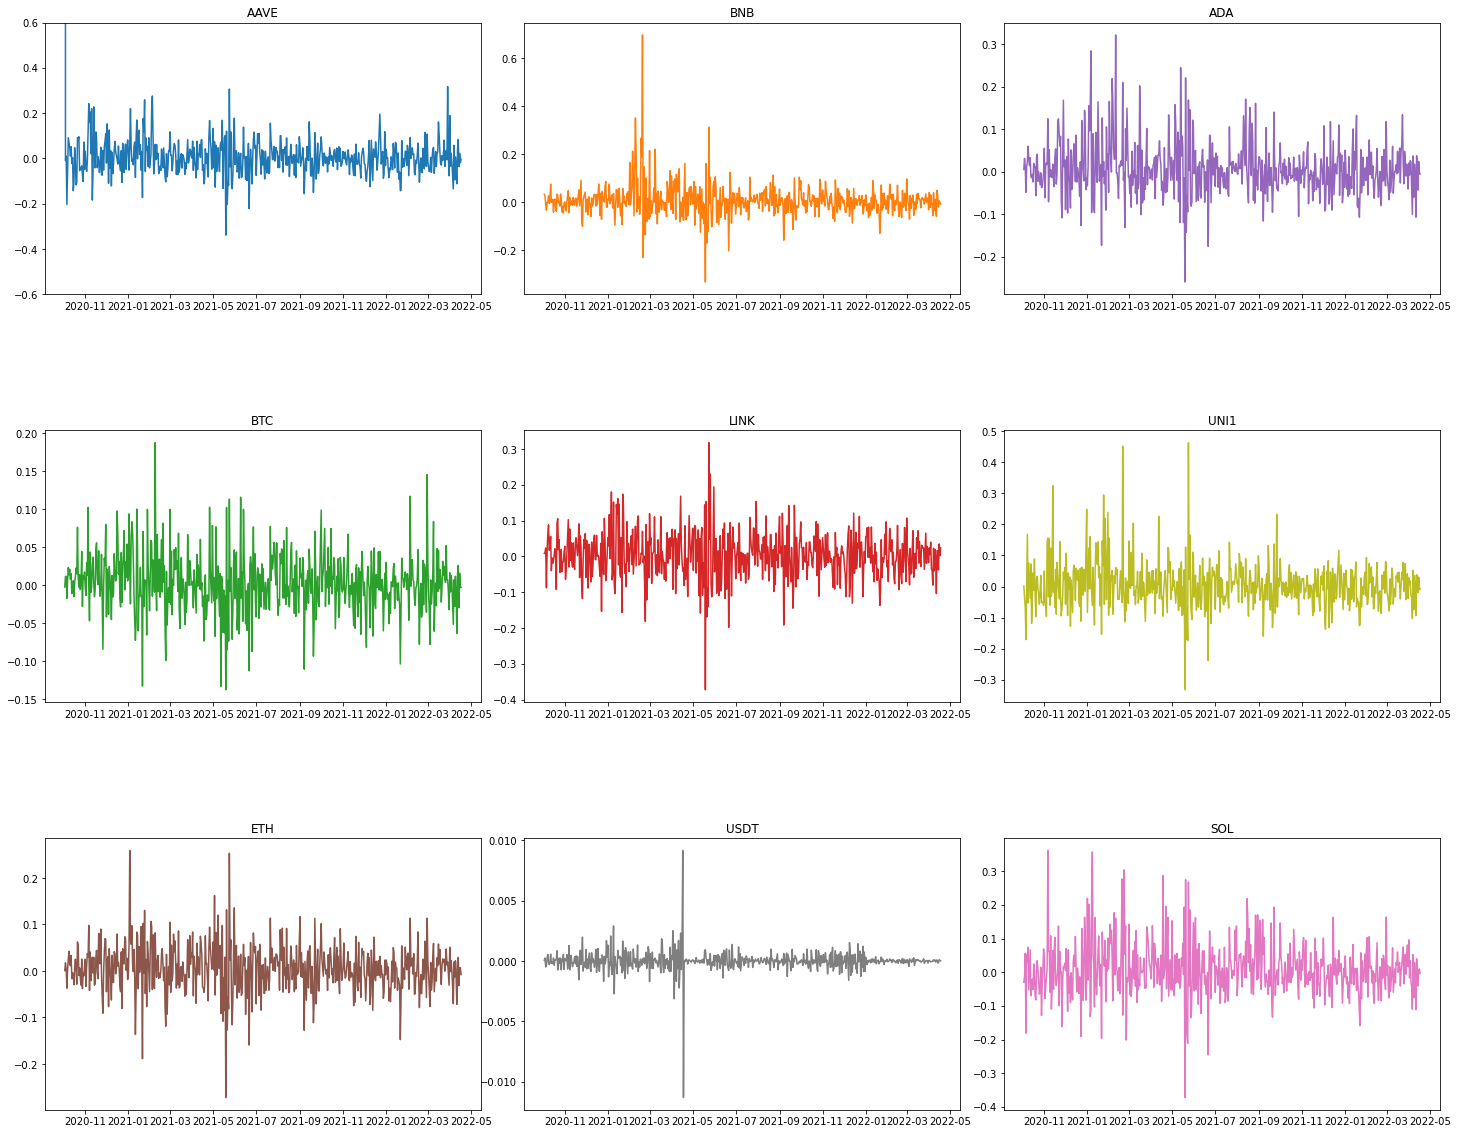

In [307]:
fig, axs = plt.subplots(3, 3, figsize=(25,20), gridspec_kw={'hspace': 0.5, 'wspace': 0.1})

axs[0,0].plot(daily_returns['AAVE-USD'], c='#1f77b4')
axs[0,0].set_title('AAVE')

axs[0,0].set_ylim([-0.6, 0.6])

axs[0,1].plot(daily_returns['BNB-USD'], c='#ff7f0e')
axs[0,1].set_title('BNB')

axs[1,0].plot(daily_returns['BTC-USD'], c='#2ca02c')
axs[1,0].set_title('BTC')

axs[1,1].plot(daily_returns['LINK-USD'], c='#d62728')
axs[1,1].set_title('LINK')

axs[0,2].plot(daily_returns['ADA-USD'], c='#9467bd')
axs[0,2].set_title('ADA')

axs[2,0].plot(daily_returns['ETH-USD'], c='#8c564b')
axs[2,0].set_title('ETH')

axs[2,2].plot(daily_returns['SOL-USD'], c='#e377c2')
axs[2,2].set_title('SOL')

axs[2,1].plot(daily_returns['USDT-USD'], c='#7f7f7f')
axs[2,1].set_title('USDT')

axs[1,2].plot(daily_returns['UNI1-USD'], c='#bcbd22')
axs[1,2].set_title('UNI1')


### Returns distribution (Histographs)

Text(0.5, 1.0, 'UNI1')

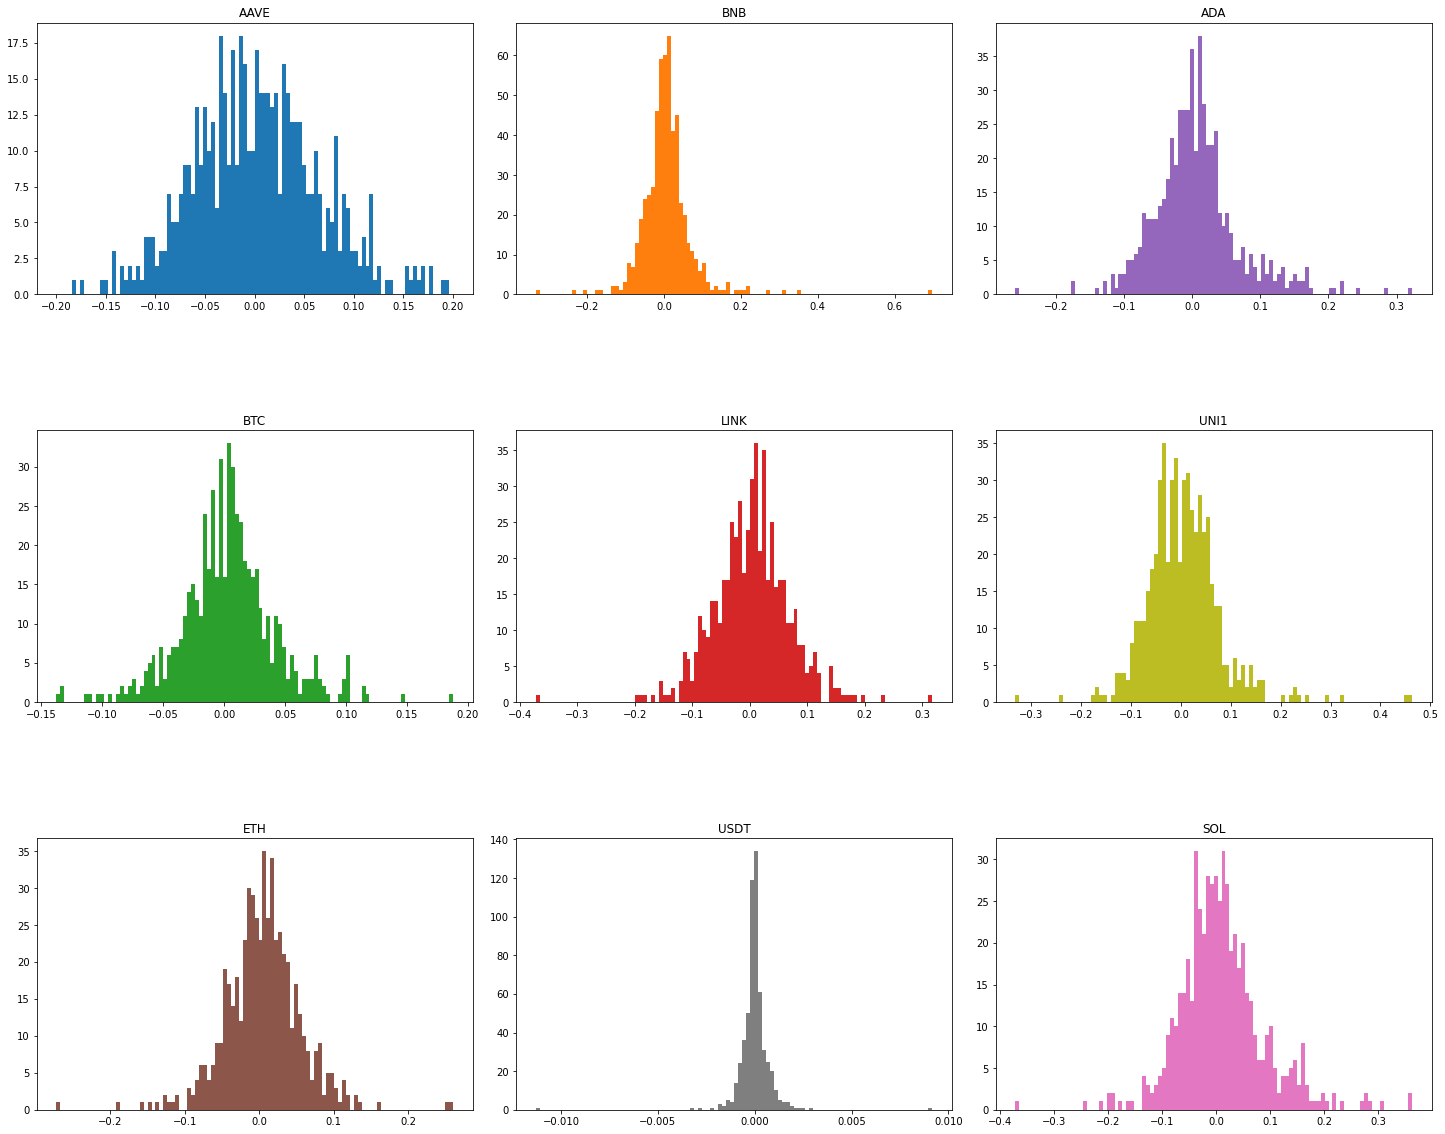

In [308]:
fig, axs = plt.subplots(3, 3, figsize=(25,20), gridspec_kw={'hspace': 0.5, 'wspace': 0.1})

axs[0,0].hist(daily_returns['AAVE-USD'], bins=100, color='#1f77b4',range=(-0.2, 0.2))
axs[0,0].set_title('AAVE')

axs[0,1].hist(daily_returns['BNB-USD'], color='#ff7f0e',bins=100, )
axs[0,1].set_title('BNB')

axs[1,0].hist(daily_returns['BTC-USD'], color='#2ca02c',bins=100)
axs[1,0].set_title('BTC')

axs[1,1].hist(daily_returns['LINK-USD'], color='#d62728',bins=100)
axs[1,1].set_title('LINK')

axs[0,2].hist(daily_returns['ADA-USD'], color='#9467bd',bins=100)
axs[0,2].set_title('ADA')

axs[2,0].hist(daily_returns['ETH-USD'], color='#8c564b',bins=100)
axs[2,0].set_title('ETH')

axs[2,2].hist(daily_returns['SOL-USD'], color='#e377c2',bins=100)
axs[2,2].set_title('SOL')

axs[2,1].hist(daily_returns['USDT-USD'], color='#7f7f7f',bins=100)
axs[2,1].set_title('USDT')

axs[1,2].hist(daily_returns['UNI1-USD'], color='#bcbd22',bins=100)
axs[1,2].set_title('UNI1')

### Extreme/Exceptional Returns

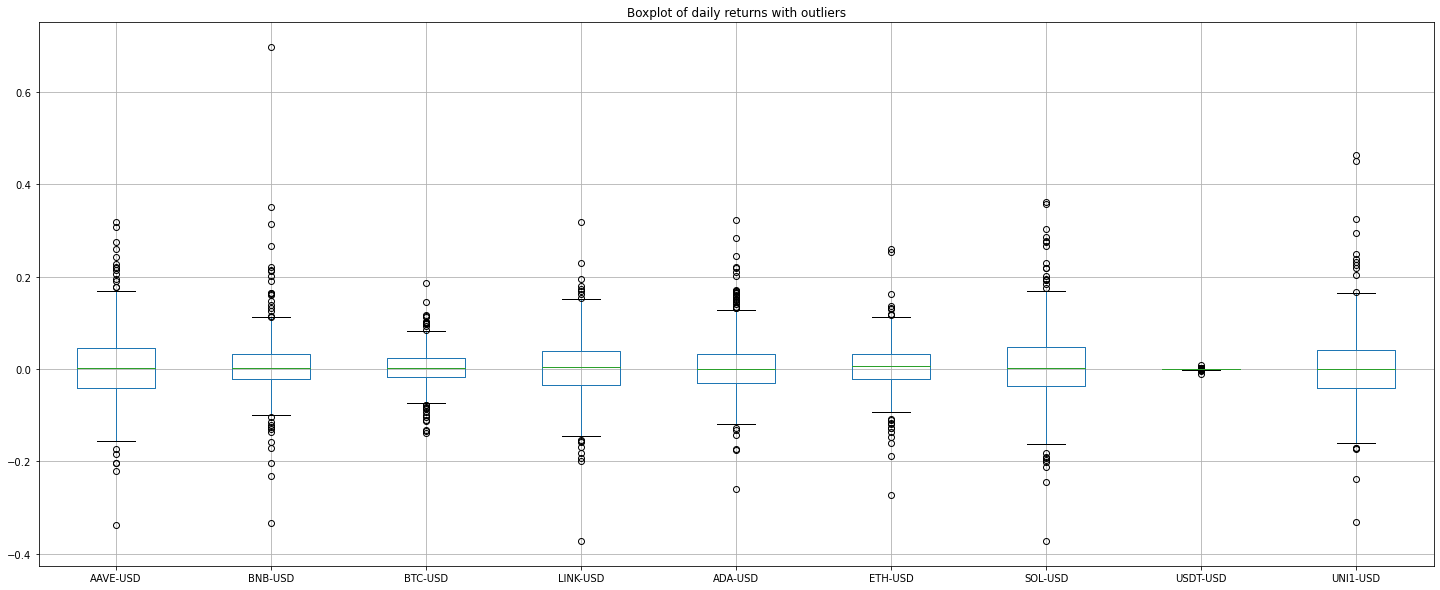

In [309]:
daily_returns_boxplot = daily_returns.iloc[1:-1]
daily_returns_boxplot.boxplot(figsize = (25,10))
plt.title('Boxplot of daily returns with outliers')
plt.show()


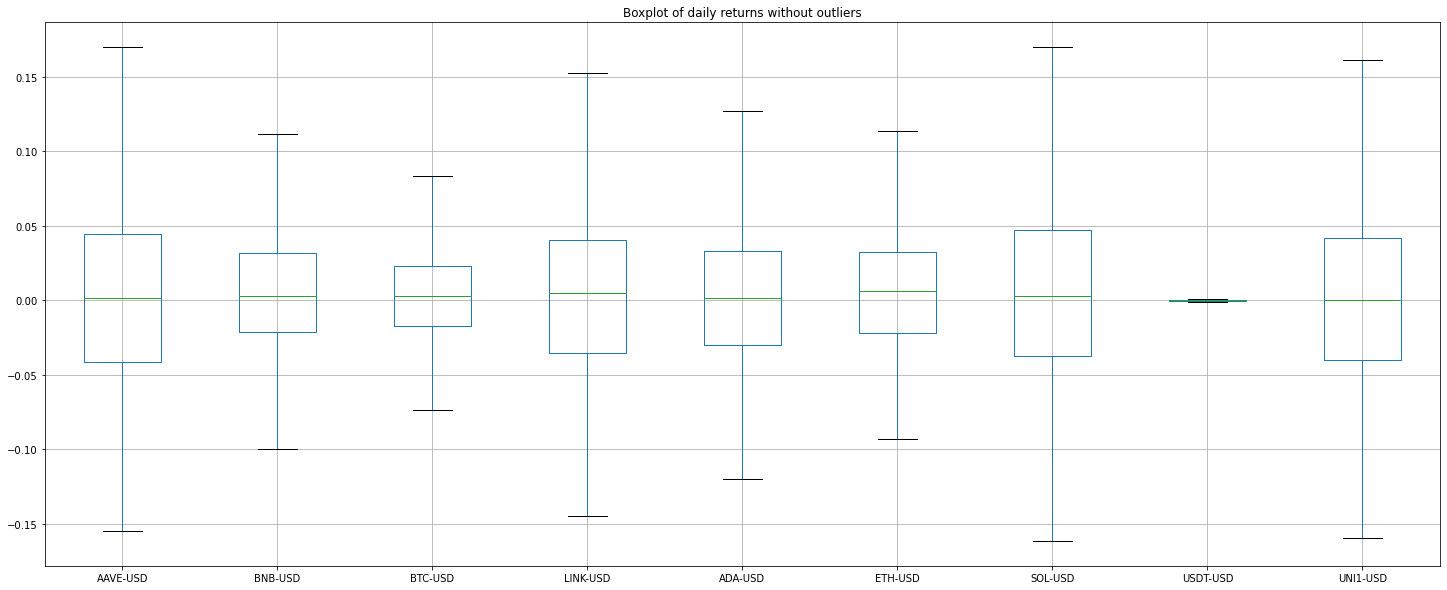

In [311]:
daily_returns.boxplot(showfliers=False,figsize = (25,10))
plt.title('Boxplot of daily returns without outliers')
plt.show()

### Correlation Matrix of Crypto returns

In [312]:
daily_returns.corr()

Symbols,AAVE-USD,BNB-USD,BTC-USD,LINK-USD,ADA-USD,ETH-USD,SOL-USD,USDT-USD,UNI1-USD
Symbols,,,,,,,,,
AAVE-USD,1.000000,0.025061,0.002786,0.014905,0.008459,0.008201,-0.012043,0.004055,0.010787
BNB-USD,0.025061,1.000000,0.600121,0.588830,0.527108,0.617390,0.499934,0.004101,0.452359
BTC-USD,0.002786,0.600121,1.000000,0.668512,0.585338,0.768218,0.408742,-0.041199,0.534478
LINK-USD,0.014905,0.588830,0.668512,1.000000,0.644840,0.788458,0.489467,-0.005961,0.640583
ADA-USD,0.008459,0.527108,0.585338,0.644840,1.000000,0.650679,0.435817,0.007689,0.563671
ETH-USD,0.008201,0.617390,0.768218,0.788458,0.650679,1.000000,0.538310,-0.024627,0.669529
SOL-USD,-0.012043,0.499934,0.408742,0.489467,0.435817,0.538310,1.000000,-0.078735,0.412246
USDT-USD,0.004055,0.004101,-0.041199,-0.005961,0.007689,-0.024627,-0.078735,1.000000,0.038253
UNI1-USD,0.010787,0.452359,0.534478,0.640583,0.563671,0.669529,0.412246,0.038253,1.000000


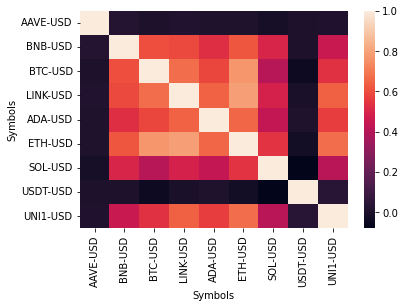

In [313]:
sns.heatmap(daily_returns.corr())
plt.show()

#### To proceed further, please install these packages:

pip install pystan

pip install fbprophet

### Prediction Model (Backtesting) using fbprophet

In [314]:
end1 = dt.date(end.year - 1, end.month, end.day) #1 years back

##changing date accordingly if early half vs late half of the year
if (end.month <=6):
    end2 = dt.date(end.year-1, 6+end.month, end.day) #6 months back
else:
    end2 = dt.date(end.year, end.month-6, end.day)
    
##setting start date to 3 years before the end dates
start1 = dt.date(end1.year - 3, end.month, end.day) #3 years before end1

#final start and end for future prediction
startfinal = dt.date(end.year-3, end.month, end.day) # 3 years before now
endfinal = dt.date(end.year, end.month, end.day) #now

In [315]:
##getting 3 datasets, df1 and df2 for backtest prediction, while df is for future prediction
df1 = reader.get_data_yahoo(cryptolist, start1, end1)['Adj Close']
df2 = reader.get_data_yahoo(cryptolist, start1, end2)['Adj Close']
df = reader.get_data_yahoo(cryptolist, startfinal, endfinal)['Adj Close']

In [316]:
##resetting the indexes of the dataset
##run this ONLY ONCE

df1 = df1.reset_index()
df2 = df2.reset_index()
df = df.reset_index()

In [317]:
##creating Prophet model and fitting it

modelfb1 = Prophet(daily_seasonality = False)
df1[['ds', 'y']] = df1[['Date', 'BTC-USD']]
modelfb1.fit(df1)

In [318]:
##creating Prophet model and fitting it

modelfb2 = Prophet(daily_seasonality = False)
df2[['ds', 'y']] = df2[['Date', 'BTC-USD']]
modelfb2.fit(df2)

In [319]:
#Adding 1-years date into future model dataset, setting periods as 365 days -> 1 years

future = modelfb1.make_future_dataframe(periods = 365, freq = 'D')

In [320]:
#Adding 6 months date into future model dataset, setting periods as 180 days -> 6 months

future1 = modelfb2.make_future_dataframe(periods=180, freq = 'D')

In [321]:
forecast1 = modelfb1.predict(future) #1 years backtest model
forecast2 = modelfb2.predict(future1) #6 months backtest model

### 1 years prediction based on data from 2018-4-16 till 2021-4-17

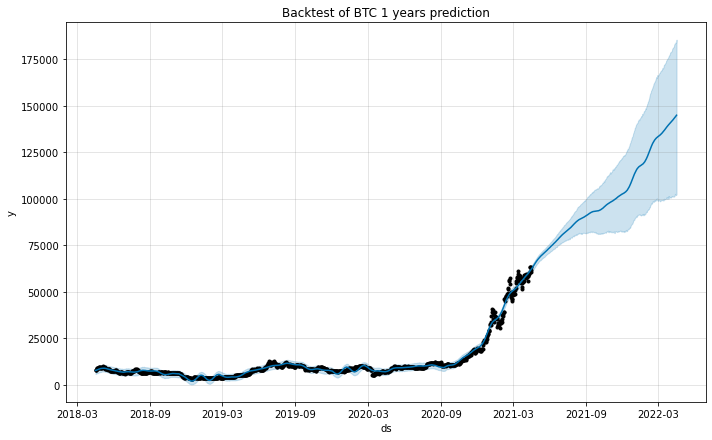

In [322]:
modelfb1.plot(forecast1)
plt.title('Backtest of BTC 1 years prediction')
plt.show()

### 6 months prediction based on data from 2018-4-16 till 2021-10-17

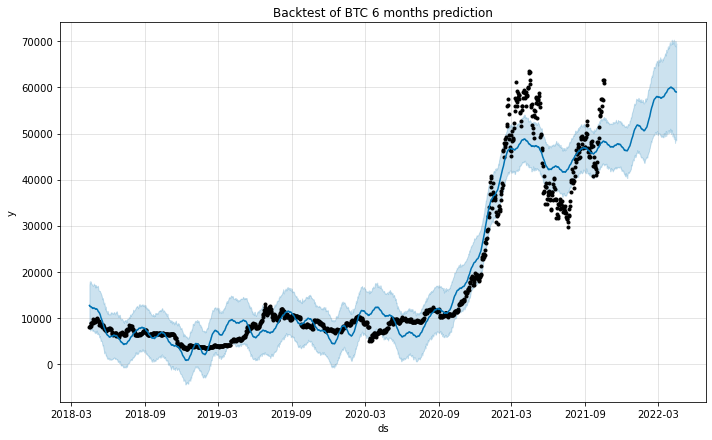

In [323]:
modelfb2.plot(forecast2)
plt.title('Backtest of BTC 6 months prediction')
plt.show()

## We can see that the first prediction data is not as accurate, compared to the second one, as there is a recorded drop in prices from 2021-4 onwards, which is not recorded in the dataset


### Future 6 Months Prediction

In [324]:
modelfb3 = Prophet(daily_seasonality = False)
df[['ds', 'y']] = df[['Date', 'BTC-USD']]
modelfb3.fit(df)

In [328]:
#adding 6 months to the dataset for prediction
future3 = modelfb3.make_future_dataframe(periods=180) 

In [329]:
forecast3 = modelfb3.predict(future3)

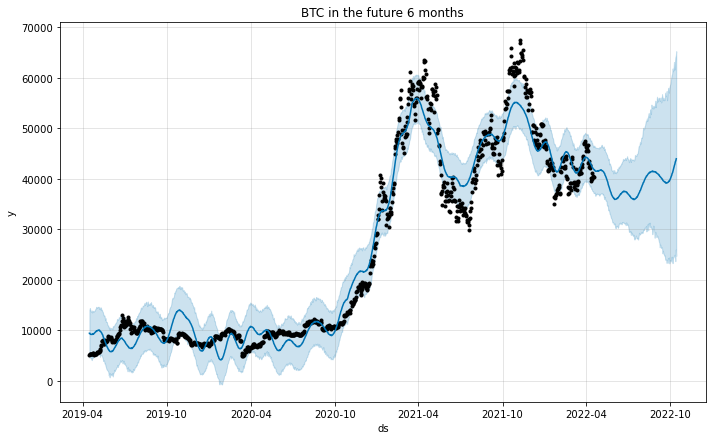

In [330]:
modelfb3.plot(forecast3)
plt.title('BTC in the future 6 months')
plt.show()

## Since the data is more updated, we noticed that the predicted value of BTC in the future graph is much lower than the predicted value of the backtest graphs

## So how about the rest?

In [331]:
##removing BTC from cryptolist since we have done it above

cryptolist.remove("BTC-USD")

## Combining everything into a function..

In [332]:
def prophetprediction(cryptolist):
    
    ##doing it for every single cryptocurrency here
    for x in cryptolist:
        ##setting each crypto as the main one to fit
        df2['y'] = df2[x]
        df1['y'] = df1[x]
        df['y'] = df[x]
        
        ##for those relatively new crypto, there will be NAN inputted in the earlier dates, so we will drop those
        df1_new = df1.dropna(axis = 0,subset = [x])
        df2_new = df2.dropna(axis = 0,subset = [x])
        df_new = df.dropna(axis = 0,subset = [x])
        modelfb1 = Prophet(daily_seasonality = False)
        modelfb2 = Prophet(daily_seasonality = False)
        modelfb3 = Prophet(daily_seasonality = False)
        
        ##fitting all the models
        modelfb1.fit(df1_new)
        modelfb2.fit(df2_new)
        modelfb3.fit(df_new)
        
        #Adding 1-years date into future model dataset, setting periods as 365 days -> 1 years
        future1 = modelfb1.make_future_dataframe(periods = 365, freq = 'D')
        
        #Adding 6 months date into future model dataset, setting periods as 180 days -> 6 months
        future2 = modelfb2.make_future_dataframe(periods=180, freq = 'D')

        
        #adding 6 months to the df dataset for prediction
        future3 = modelfb3.make_future_dataframe(periods=180) 
        
        #1 years backtest model
        forecast1 = modelfb1.predict(future1)
        
        #6 months backtest model
        forecast2 = modelfb2.predict(future2) 
        
        #6 months future model
        forecast3 = modelfb3.predict(future3) 
        
        ##setting labels for clarity
        label1 = 'Backtest of ' + x + ' 1 years prediction'
        label2 = 'Backtest of ' + x + ' 6 months prediction'
        label3 = x +' in the future of 6 months'
        
        ##first model, for 1 year backtest
        modelfb1.plot(forecast1)
        plt.title(label1)
        plt.show()
        
        #second model, for 6 months backtest
        modelfb2.plot(forecast2)
        plt.title(label2)
        plt.show()
        
        #third model, for 6 months future predictions
        modelfb3.plot(forecast3)
        plt.title(label3)
        plt.show()

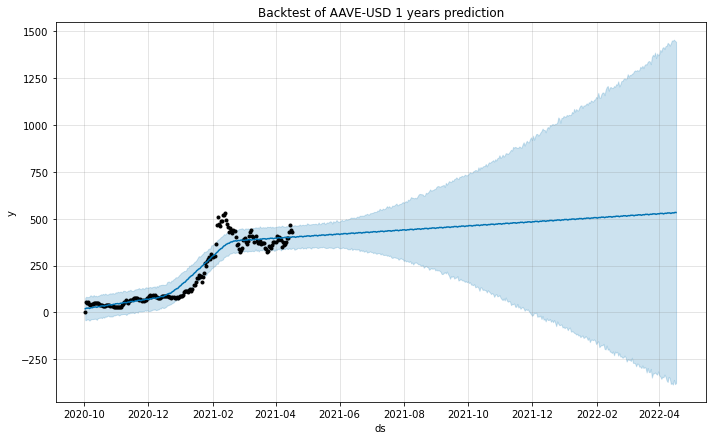

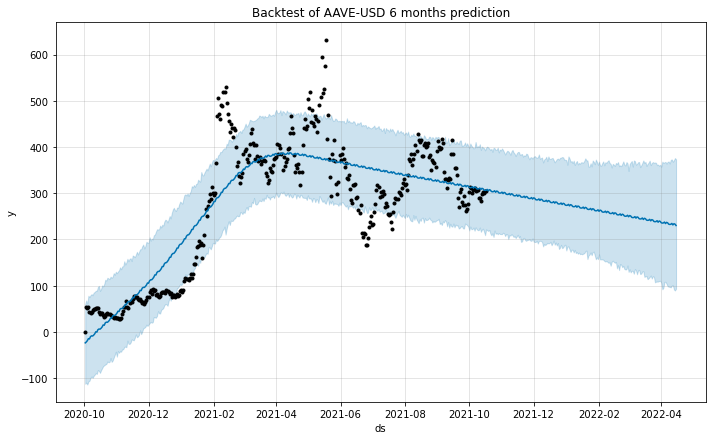

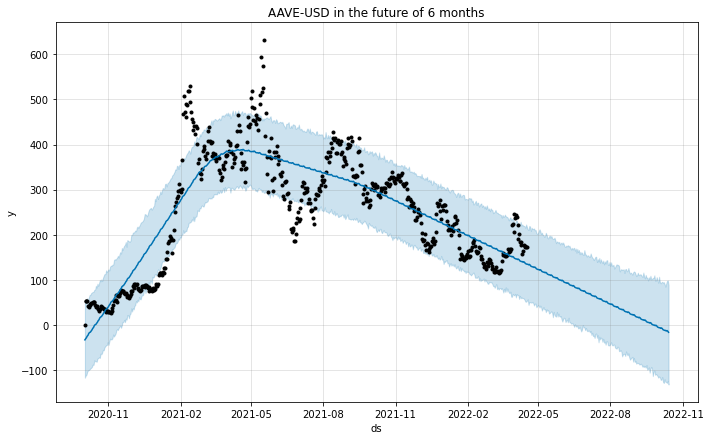

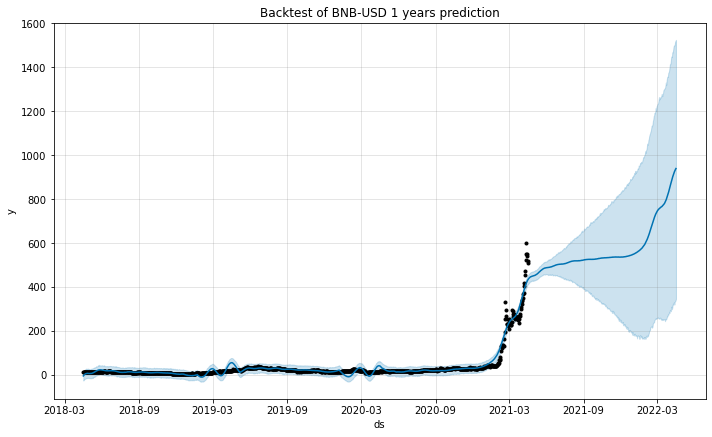

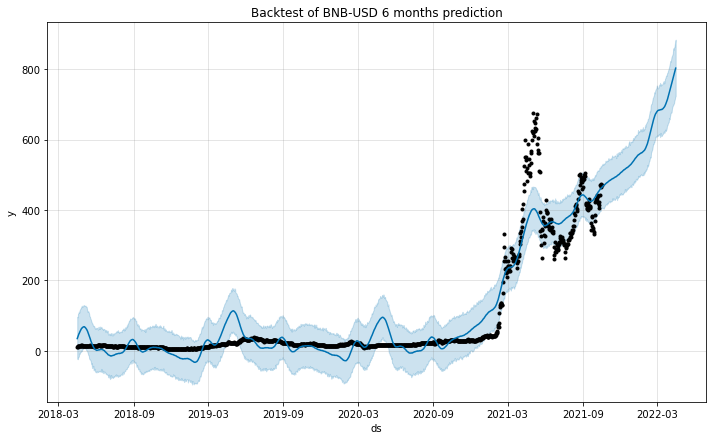

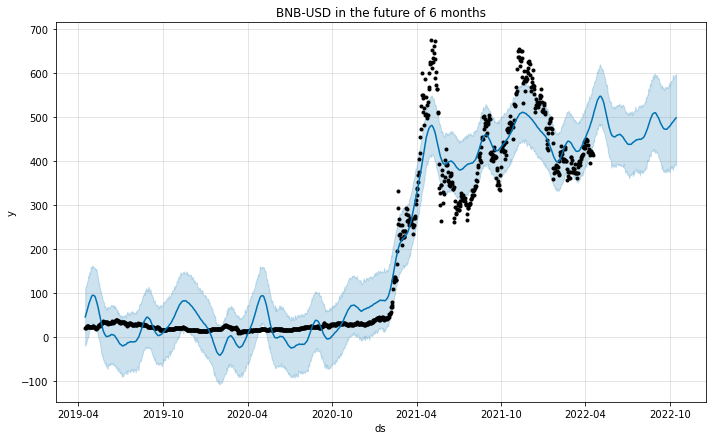

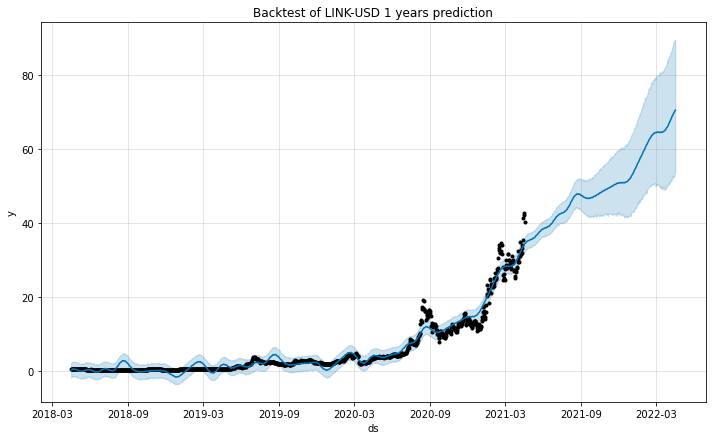

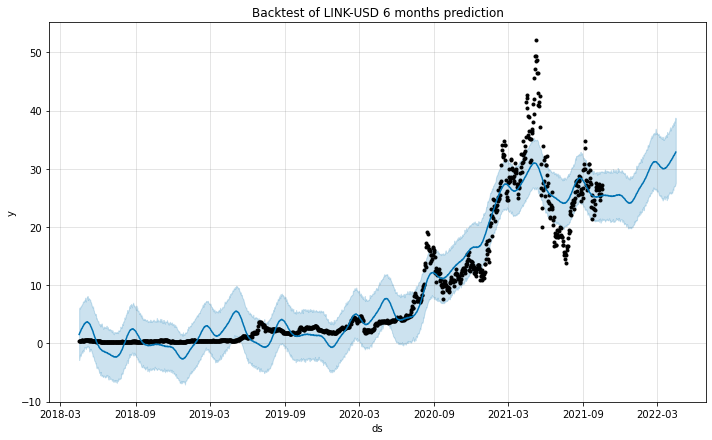

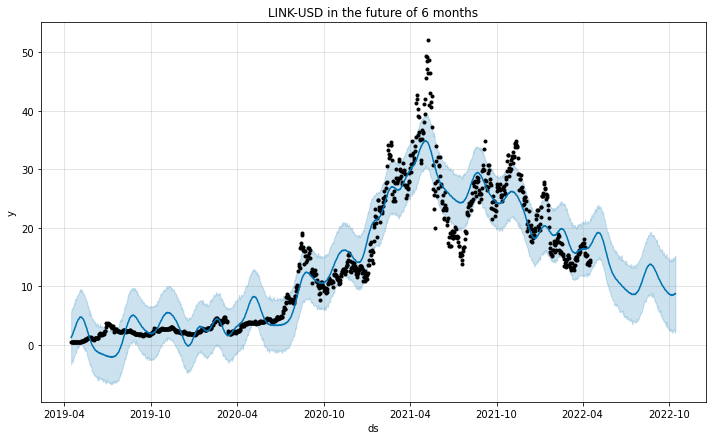

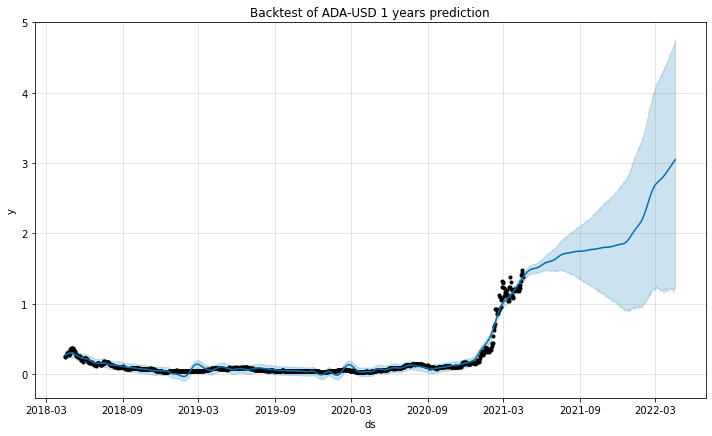

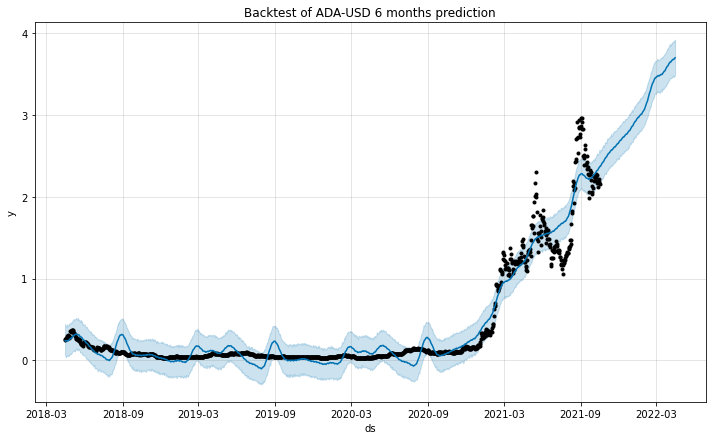

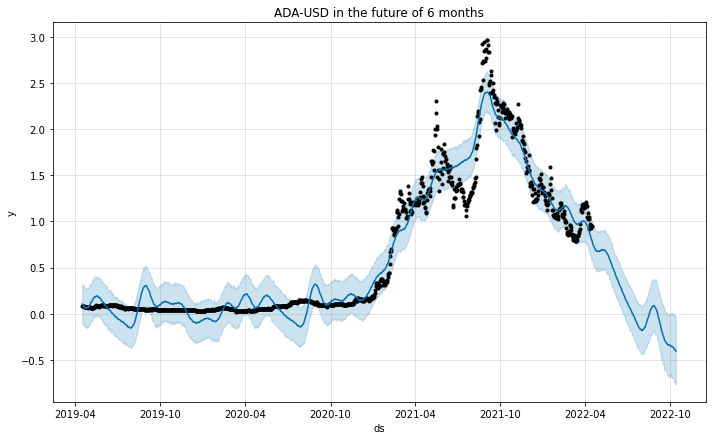

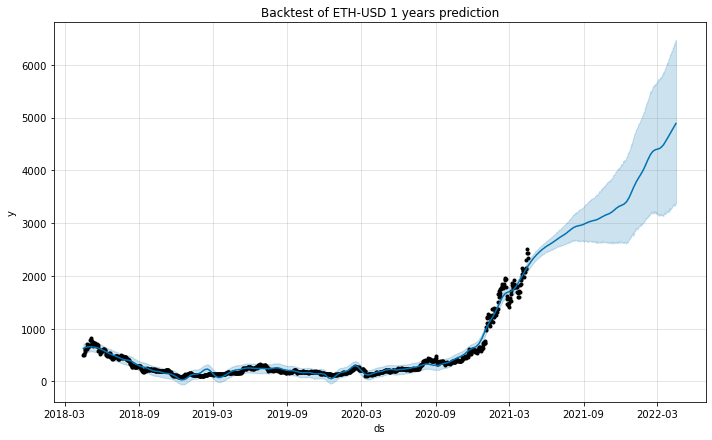

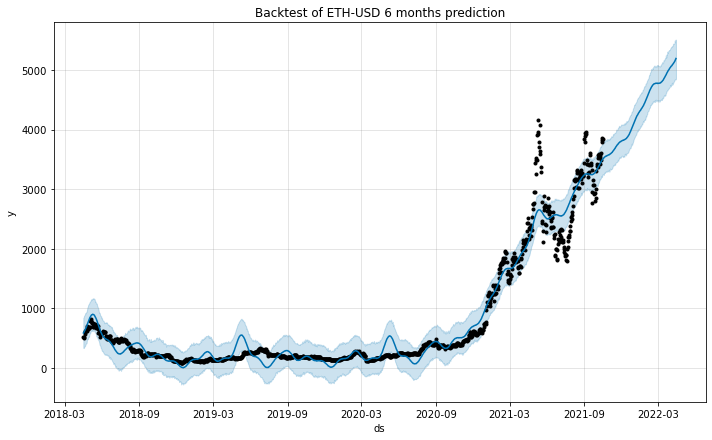

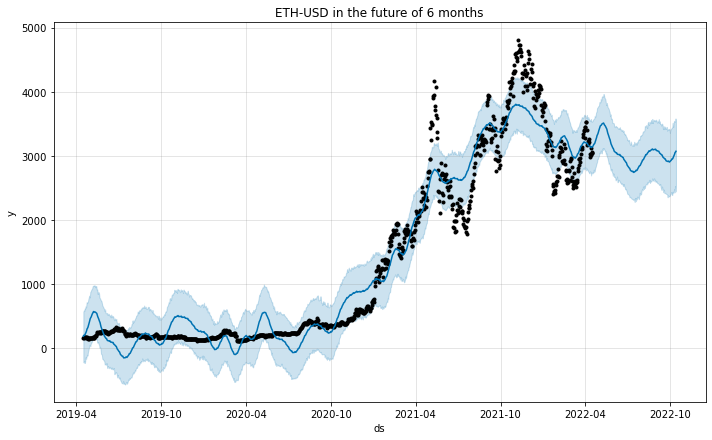

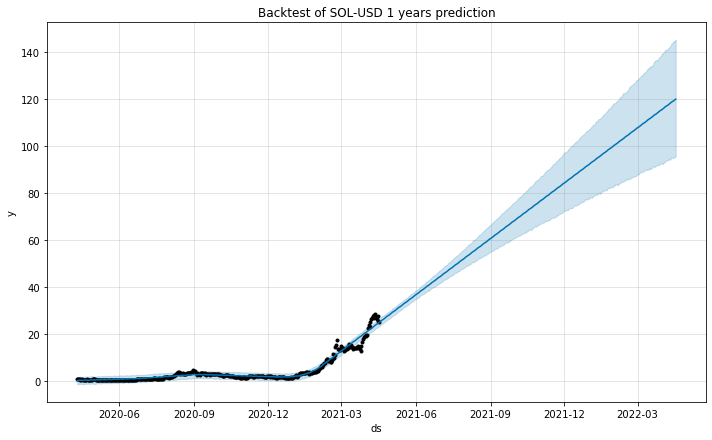

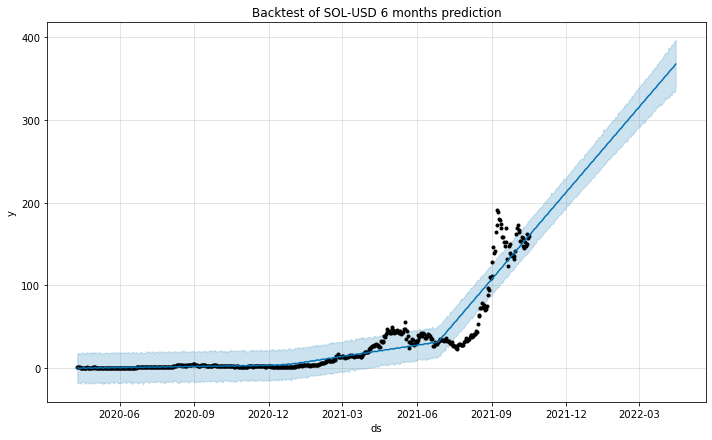

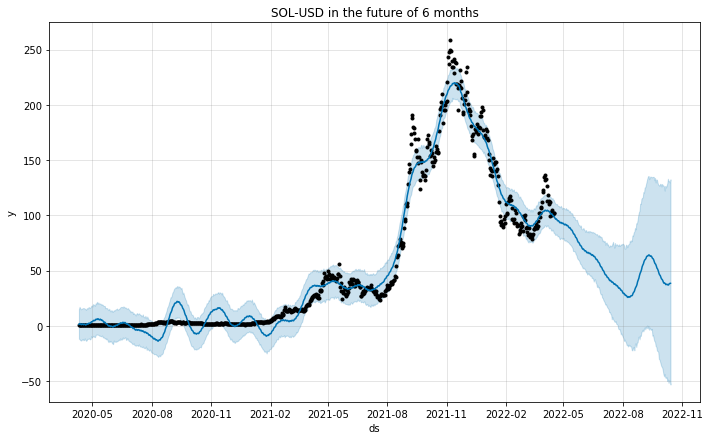

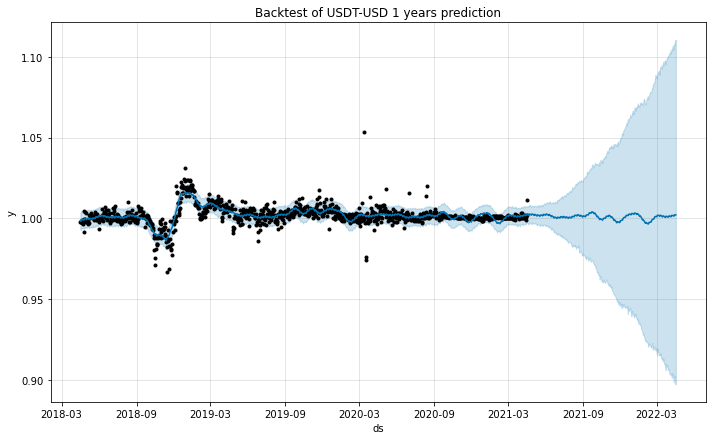

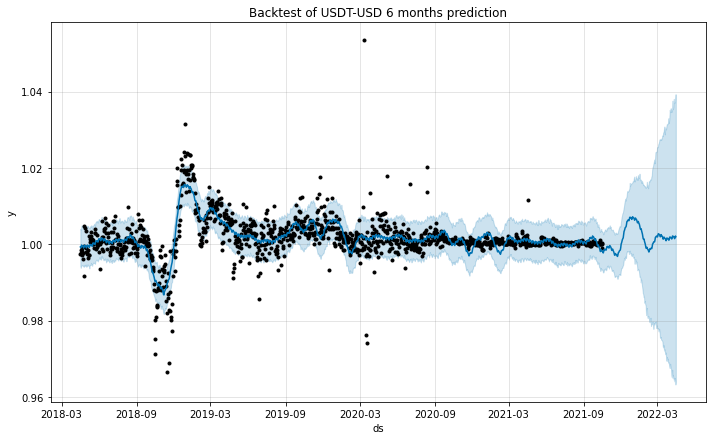

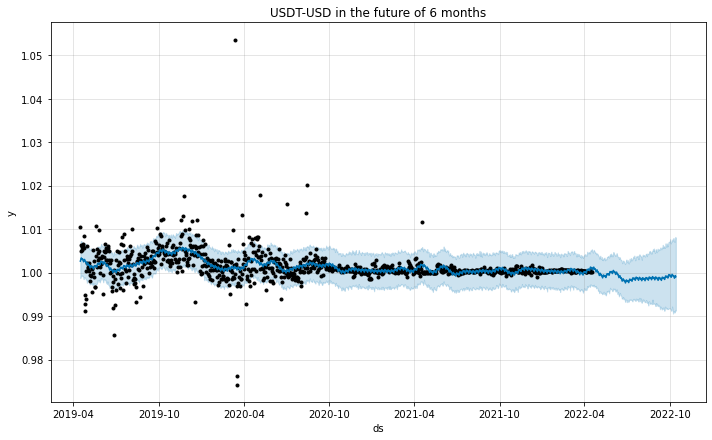

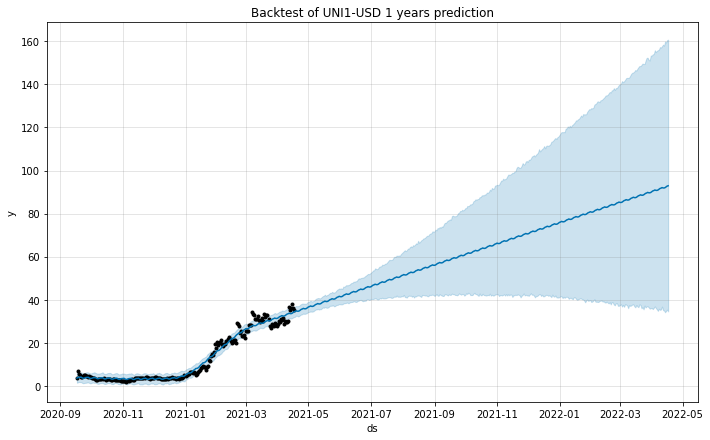

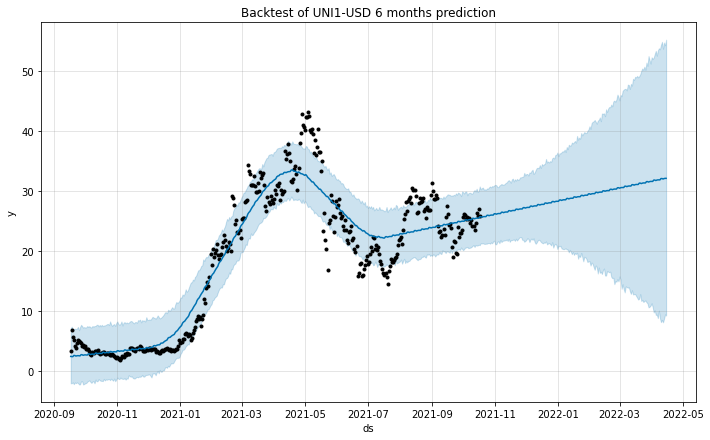

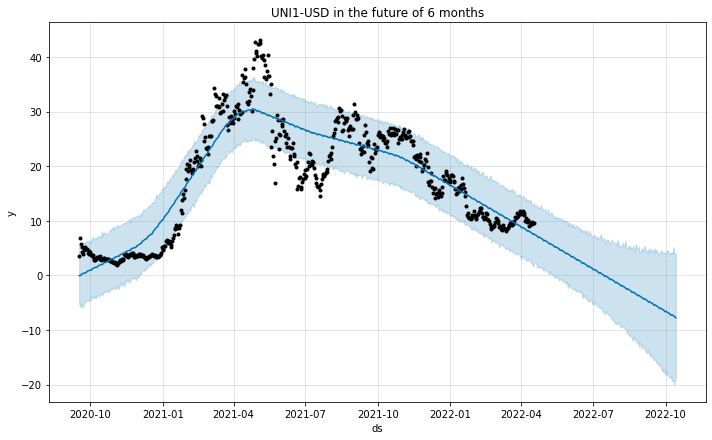

In [333]:
prophetprediction(cryptolist)